In [1]:
from typing import List, Tuple

In [2]:
import numpy as np
import tensorflow as tf

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical

In [88]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [116]:
import matplotlib.pyplot as plt

In [4]:
pares : List[ Tuple[str, str] ] = [
    ("Hello", "Olá"),
    ("Good morning", "Bom dia"),
    ("Good afternoon", "Boa tarde"),
    ("Good evening", "Boa noite"),
    ("Good night", "Boa noite"),
    ("How are you?", "Como você está?"),
    ("I'm fine, thank you.", "Estou bem, obrigado."),
    ("What's your name?", "Qual é o seu nome?"),
    ("My name is John.", "Meu nome é John."),
    ("Nice to meet you.", "Prazer em conhecê-lo."),
    ("Please", "Por favor"),
    ("Thank you", "Obrigado"),
    ("You're welcome", "De nada"),
    ("Excuse me", "Com licença"),
    ("I'm sorry", "Desculpe"),
    ("Yes", "Sim"),
    ("No", "Não"),
    ("Maybe", "Talvez"),
    ("I don't know", "Eu não sei"),
    ("I understand", "Eu entendo"),
    ("I don't understand", "Eu não entendo"),
    ("Can you help me?", "Você pode me ajudar?"),
    ("Where is the bathroom?", "Onde fica o banheiro?"),
    ("How much does it cost?", "Quanto custa?"),
    ("I would like a coffee.", "Eu gostaria de um café."),
    ("Do you speak English?", "Você fala inglês?"),
    ("I speak a little Portuguese.", "Eu falo um pouco de português."),
    ("What time is it?", "Que horas são?"),
    ("I'm hungry.", "Estou com fome."),
    ("I'm thirsty.", "Estou com sede."),
    ("I'm tired.", "Estou cansado."),
    ("I need a doctor.", "Eu preciso de um médico."),
    ("Call the police!", "Chame a polícia!"),
    ("I love you.", "Eu te amo."),
    ("Congratulations!", "Parabéns!"),
    ("Happy birthday!", "Feliz aniversário!"),
    ("Merry Christmas!", "Feliz Natal!"),
    ("Happy New Year!", "Feliz Ano Novo!"),
    ("Good luck!", "Boa sorte!"),
    ("Have a nice day!", "Tenha um bom dia!"),
    ("See you later.", "Até mais."),
    ("Goodbye", "Adeus"),
    ("What's your phone number?", "Qual é o seu número de telefone?"),
    ("Where do you live?", "Onde você mora?"),
    ("I live in São Paulo.", "Eu moro em São Paulo."),
    ("I'm from Brazil.", "Eu sou do Brasil."),
    ("What do you do?", "O que você faz?"),
    ("I'm a teacher.", "Eu sou professor."),
    ("I work in an office.", "Eu trabalho em um escritório."),
    ("I'm a student.", "Eu sou estudante."),
    ("I like to read books.", "Eu gosto de ler livros."),
    ("I enjoy listening to music.", "Eu gosto de ouvir música."),
    ("I like to travel.", "Eu gosto de viajar."),
    ("What's your favorite food?", "Qual é a sua comida favorita?"),
    ("I like pizza.", "Eu gosto de pizza."),
    ("Do you have any pets?", "Você tem animais de estimação?"),
    ("I have a dog.", "Eu tenho um cachorro."),
    ("I don't have any pets.", "Eu não tenho animais de estimação."),
    ("What's your favorite color?", "Qual é a sua cor favorita?"),
    ("My favorite color is blue.", "Minha cor favorita é azul."),
    ("Do you like sports?", "Você gosta de esportes?"),
    ("I like soccer.", "Eu gosto de futebol."),
    ("I don't like sports.", "Eu não gosto de esportes."),
    ("What did you do yesterday?", "O que você fez ontem?"),
    ("I went to the movies.", "Eu fui ao cinema."),
    ("I stayed at home.", "Eu fiquei em casa."),
    ("What are you doing now?", "O que você está fazendo agora?"),
    ("I'm studying English.", "Estou estudando inglês."),
    ("I'm watching TV.", "Estou assistindo TV."),
    ("Do you have brothers or sisters?", "Você tem irmãos ou irmãs?"),
    ("I have one brother.", "Eu tenho um irmão."),
    ("I have two sisters.", "Eu tenho duas irmãs."),
    ("I'm an only child.", "Eu sou filho único."),
    ("What time do you wake up?", "A que horas você acorda?"),
    ("I wake up at 7 a.m.", "Eu acordo às 7 da manhã."),
    ("What time do you go to bed?", "A que horas você vai dormir?"),
    ("I go to bed at 10 p.m.", "Eu vou dormir às 10 da noite."),
    ("Do you like to cook?", "Você gosta de cozinhar?"),
    ("Yes, I love cooking.", "Sim, eu adoro cozinhar."),
    ("No, I don't like to cook.", "Não, eu não gosto de cozinhar."),
    ("What's your favorite movie?", "Qual é o seu filme favorito?"),
    ("I like action movies.", "Eu gosto de filmes de ação."),
    ("I prefer comedies.", "Eu prefiro comédias."),
    ("Do you play any instruments?", "Você toca algum instrumento?"),
    ("I play the guitar.", "Eu toco violão."),
    ("I don't play any instruments.", "Eu não toco nenhum instrumento."),
    ("What's the weather like?", "Como está o tempo?"),
    ("It's sunny.", "Está ensolarado."),
    ("It's raining.", "Está chovendo."),
    ("It's cold.", "Está frio."),
    ("It's hot.", "Está quente."),
    ("Do you like reading?", "Você gosta de ler?"),
    ("Yes, I read every day.", "Sim, eu leio todos os dias."),
    ("No, I prefer watching movies.", "Não, eu prefiro assistir filmes."),
    ("What's your favorite book?", "Qual é o seu livro favorito?"),
    ("I like mystery novels.", "Eu gosto de romances de mistério."),
    ("I enjoy science fiction.", "Eu gosto de ficção científica."),
    ("Can you drive?", "Você sabe dirigir?"),
    ("Yes, I have a driver's license.", "Sim, eu tenho carteira de motorista."),
    ("No, I don't drive.", "Não, eu não dirijo."),
    ("Do you like coffee or tea?", "Você gosta de café ou chá?"),
    ("I prefer coffee.", "Eu prefiro café."),
    ("I like both.", "Eu gosto dos dois."),
    ("I don't like either.", "Eu não gosto de nenhum."),
]

In [5]:
textos_ingles : List[str ] = []
textos_portugues : List[ str ] = []

In [6]:
for par in pares:
    textos_ingles.append(par[0])
    textos_portugues.append("<BOS> " + par[1] + " <EOS>")

In [7]:
tokenizer_ingles = Tokenizer()
tokenizer_ingles.fit_on_texts( textos_ingles )
vocabulario_ingles = tokenizer_ingles.word_index

In [8]:
tokenizer_portugues = Tokenizer()
tokenizer_portugues.fit_on_texts( textos_portugues )
vocabulario_portugues = tokenizer_portugues.word_index

In [9]:
sequencias_ingles = tokenizer_ingles.texts_to_sequences( textos_ingles )
print(textos_ingles[0:5])
print(sequencias_ingles[0:5])

['Hello', 'Good morning', 'Good afternoon', 'Good evening', 'Good night']
[[62], [13, 63], [13, 64], [13, 65], [13, 66]]


In [10]:
sequencias_portugues = tokenizer_portugues.texts_to_sequences( textos_portugues )
print(textos_portugues[0:5])
print(sequencias_portugues[0:5])

['<BOS> Olá <EOS>', '<BOS> Bom dia <EOS>', '<BOS> Boa tarde <EOS>', '<BOS> Boa noite <EOS>', '<BOS> Boa noite <EOS>']
[[1, 57, 2], [1, 31, 32, 2], [1, 17, 58, 2], [1, 17, 23, 2], [1, 17, 23, 2]]


In [24]:
maximo_palavras = 0
for seq in sequencias_ingles:
    if len(seq) > maximo_palavras:
        maximo_palavras = len(seq)

for seq in sequencias_portugues:
    if len(seq) > maximo_palavras:
        maximo_palavras = len(seq)
maximo_palavras

9

In [36]:
# x = [[1, 57, 2]]
# pad_sequences( x, maxlen=20, padding="pre" )

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 57,  2]])

In [44]:
encoder_entrada_dados = pad_sequences(sequencias_ingles, maxlen=maximo_palavras, padding="pre")
print(sequencias_ingles[0:3])
print(encoder_entrada_dados[0:3])

[[62], [13, 63], [13, 64]]
[[ 0  0  0  0  0  0  0  0 62]
 [ 0  0  0  0  0  0  0 13 63]
 [ 0  0  0  0  0  0  0 13 64]]


In [58]:
# for seq in sequencias_portugues[0:5]:
#    print(seq[:-1])

# [seq[:-1] for seq in sequencias_portugues]

In [64]:
decoder_entrada_dados = pad_sequences([seq[:-1] for seq in sequencias_portugues], maxlen=maximo_palavras, padding="pre")
print(sequencias_portugues[0:3])
print(decoder_entrada_dados[0:3])
decoder_saida_dados = pad_sequences([seq[1:] for seq in sequencias_portugues], maxlen=maximo_palavras, padding="pre")
print(sequencias_portugues[0:3])
print(decoder_saida_dados[0:3])

[[1, 57, 2], [1, 31, 32, 2], [1, 17, 58, 2]]
[[ 0  0  0  0  0  0  0  1 57]
 [ 0  0  0  0  0  0  1 31 32]
 [ 0  0  0  0  0  0  1 17 58]]
[[1, 57, 2], [1, 31, 32, 2], [1, 17, 58, 2]]
[[ 0  0  0  0  0  0  0 57  2]
 [ 0  0  0  0  0  0 31 32  2]
 [ 0  0  0  0  0  0 17 58  2]]


In [72]:
len(tokenizer_portugues.word_index)


178

In [ ]:
#    0     1       2       3      ...  177
# [0.05, 0.008, 0.0003, 0.0001, ...., 0.07]  # len => 178

In [ ]:
# [ 0  0  0  0  0  0  0 57  2]
#      0  1  2  3  4  5  6  7  ... 57 ... 176 177
# [ 
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [1, 0, 0, 0, 0, 0, 0, 0 ..........., 0,  0],
#     [0, 0, 0, 0, 0, 0, 0, .....,1, ...., 0,  0],
#     [0, 0, 1, 0, 0, 0, 0, 0 ..........., 0,  0]
# ]

In [94]:
quantidade_classes_dicionario_portugues = len(vocabulario_portugues) + 1
quantidade_classes_dicionario_ingles = len(vocabulario_ingles) + 1

In [92]:
decoder_saida_dados_onehot = to_categorical(decoder_saida_dados, num_classes=quantidade_classes_dicionario_portugues)
print(decoder_saida_dados[0:2])
print(decoder_saida_dados_onehot[0:2])

[[ 0  0  0  0  0  0  0 57  2]
 [ 0  0  0  0  0  0 31 32  2]]
[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]]


In [100]:
embedding_output_dimensions = 100
lstm_nodes = 200

In [102]:
encoder_entrada_layer = Input( shape=(None, ) )
encoder_embd_layer = Embedding( input_dim=quantidade_classes_dicionario_ingles, output_dim=embedding_output_dimensions)
encoder_embd = encoder_embd_layer( encoder_entrada_layer )
encoder_lstm_layer = LSTM( lstm_nodes, return_state = True )
encoder_lstm_result, state_h, state_c = encoder_lstm_layer( encoder_embd )
encoder_states = [state_h, state_c]

In [106]:
decoder_entrada_layer = Input( shape=(None, ) )
decoder_embd_layer = Embedding( input_dim=quantidade_classes_dicionario_portugues, output_dim=embedding_output_dimensions)
decoder_embd = decoder_embd_layer( decoder_entrada_layer )
decoder_lstm_layer = LSTM( lstm_nodes, return_state = True, return_sequences = True )
decoder_lstm_result, _, _ = decoder_lstm_layer( decoder_embd, initial_state = encoder_states )
decoder_saida_layer = Dense(quantidade_classes_dicionario_portugues, activation="softmax" )
decoder_saida = decoder_saida_layer( decoder_lstm_result )

In [110]:
model_treinamento = Model( [encoder_entrada_layer, decoder_entrada_layer], decoder_saida )

In [112]:
model_treinamento.compile( optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [114]:
resultado = model_treinamento.fit( [encoder_entrada_dados, decoder_entrada_dados], decoder_saida_dados_onehot, 
                      batch_size=8, epochs=50, validation_split=0.2 )

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.3450 - loss: 5.0021 - val_accuracy: 0.4286 - val_loss: 3.5293
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5050 - loss: 2.8868 - val_accuracy: 0.5397 - val_loss: 2.7112
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6168 - loss: 2.2443 - val_accuracy: 0.5397 - val_loss: 2.6166
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5655 - loss: 2.2809 - val_accuracy: 0.5397 - val_loss: 2.6028
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5812 - loss: 2.1135 - val_accuracy: 0.5397 - val_loss: 2.4989
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5981 - loss: 1.9664 - val_accuracy: 0.5820 - val_loss: 2.4579
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6536 - loss: 1.7427 - val_accuracy: 0.6032 - val_loss: 2.4123
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6359 - loss: 1.8363 - val_accuracy: 0.6138 - 

In [ ]:
resultado.history

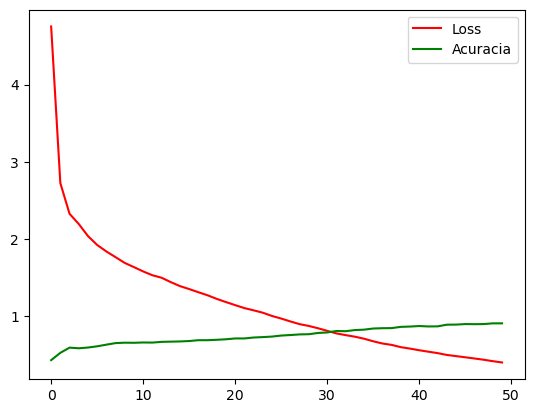

In [122]:
plt.plot(resultado.history["loss"], color="red", label="Loss")
plt.plot(resultado.history["accuracy"], color="green", label="Acuracia")
plt.legend()
plt.show()

In [124]:
modelo_encoder = Model( encoder_entrada_layer, encoder_states )

In [126]:
decoder_state_h = Input( shape = (lstm_nodes, ) )
decoder_state_c = Input( shape = (lstm_nodes, ) )
decoder_states_input = [decoder_state_h, decoder_state_c]

In [128]:
decoder_emb2 = decoder_embd_layer( decoder_entrada_layer )

In [134]:
decoder_output, state_h2, state_c2 = decoder_lstm_layer( decoder_emb2, initial_state=decoder_states_input )
decoder_output_states = [state_h2, state_c2]
decoder_saida2 = decoder_saida_layer( decoder_output )

In [136]:
modelo_decoder = Model( [decoder_entrada_layer] + decoder_states_input, [decoder_saida2] + decoder_output_states)

In [162]:
def tradutor_ingles_portugues( texto_em_ingles ): 
    seq_ingles = tokenizer_ingles.texts_to_sequences( [texto_em_ingles] )
    seq_ingles_padded = pad_sequences(seq_ingles, maxlen=maximo_palavras, padding="pre")
    state_value = modelo_encoder.predict( seq_ingles_padded )

    texto_portugues = "<BOS>"
    finalizado = False
    while not finalizado:
        # print("Gerado: ", texto_portugues)
        target_sequence = np.array(tokenizer_portugues.texts_to_sequences( [texto_portugues] ))
        # print("target_sequence: ", target_sequence)
        target_palavra_onehot, _, _ = modelo_decoder.predict( [target_sequence] + state_value )
        target_palavra_seq = np.argmax(target_palavra_onehot[0, -1, :])
        target_texto_sequence = tokenizer_portugues.sequences_to_texts( [[target_palavra_seq]] )
        if target_texto_sequence[0] == "eos":
            finalizado = True
        else:
            texto_portugues += (" " + target_texto_sequence[0]) 
            # print(target_texto_sequence[0])
    return texto_portugues
            
        

In [168]:
tradutor_ingles_portugues("good evening")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'<BOS> qual é o seu número de telefone'